# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Amanda Widya Indah Sujatmoko
- **Email:** amandawidya476@gmail.com
- **ID Dicoding:** mandawidyaaa

## Menentukan Pertanyaan Bisnis

- Penjual mana yang memiliki volume penjualan tertinggi?
- Produk apa yang memberikan kontribusi terbesar terhadap pendapatan e-commerce?
- Wilayah negara bagian mana yang memiliki jumlah pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Gathering Data Order Item

In [18]:
orderItem_df = pd.read_csv('/content/ecommerce/order_items_dataset.csv')
orderItem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Gathering Data Produk

In [19]:
product_df = pd.read_csv('/content/ecommerce/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Gathering Data Customer

In [20]:
customer_df = pd.read_csv('/content/ecommerce/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
Gathering data yang saya lakukan diatas menampilkan data-data yang saya butuhkan dalam proses analisis sesuai dengan pertanyaan yang telah saya buat yaitu data "orderItem", "product", "customer"

### Assessing Data

Menilai setiap data

In [21]:
print (orderItem_df.info(), '\n')
print (product_df.info(), '\n')
print (customer_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght  

Apakah ada data null dari setiap data?

In [22]:
print('Data null order item: \n', orderItem_df.isna().sum(), '\n')
print('Data null product: \n', product_df.isna().sum(), '\n')
print('Data null customer: \n', customer_df.isna().sum(), '\n')

Data null order item: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Data null product: 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Data null customer: 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 



apakah ada data duplikat dalam setiap data?

In [23]:
print('Data duplikat order item: \n', orderItem_df.duplicated().sum(), '\n')
print('Data duplikat product: \n', product_df.duplicated().sum(), '\n')
print('Data duplikat customer: \n', customer_df.duplicated().sum(), '\n')

Data duplikat order item: 
 0 

Data duplikat product: 
 0 

Data duplikat customer: 
 0 



Memeriksa parameter statistik setiap data

In [24]:
print('Parameter statistik order items: \n', orderItem_df.describe(), '\n')
print('Parameter statistik product: \n', product_df.describe(), '\n')
print('Parameter statistik customer: \n', customer_df.describe(), '\n')

Parameter statistik order items: 
        order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000 

Parameter statistik product: 
        product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%  

**Insight:**
Assesing Data merupakan proses penilaian data atau mengecek setiap data yang telah kita dapat dari proses Gathering Data, pada proses Assesing Data yang telah saya lakukan diatas saya melakukan pengecekan data seperti mengecek info setiap data, menghitung nilai null (missing value) setiap data, mengecek adanya duplikat setiap data, dan mengecek parameter statistik.
- Mengecek info data menampilkan jumlah setiap data dan dapat melihat tipe data tersebut, pada hasil pengecekan yang saya lakukan pada tahapan ini terdapat kesalahan jumlah data yang tidak sama pada data "product"
- Menghitung nilai null (missing value) menampilkan jumlah data yang memiliki missing value pada setiap data, pada hasil pengecekan yang saya lakukan pada tahap ini terdapat missing value pada data "product" tepatnya pada bagian 'product_category_name', 'product_name_lenght', 'product_description_length', 'product_photos_qty' sejumlah 610. Kemudian pada bagian 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' sejumlah 2.
- Mengecek duplikat data menampilkan jumlah duplikat setiap data, pada hasil pengecekan yang telah saya lakukan pada ini tidak terdapat duplikasi pada setiap data
- Mengecek parameter statistik menampilkan jumlah data, rata-rata, standar devisiason, minimal, Quartil 1 - 3 dan maximal keseluruhan nilai setiap data, seperti hasil pengecekan yang telah saya lakukan di atas

### Cleaning Data

Terdapat missing values pada data produk dibagian "product_category_name", bagian tersebut cukup penting dalam analisis data, namun karena jumlah missing value pada bagian tersebut sama dengan missing values di bagian "product_name_lenght", "product_description_lenght", dan "product_photos_qty" bisa jadi produk tersebut memang belum tersedia pada e-commerce. Maka akan dilakukan dropping untuk missing values tersebut.

In [25]:
product_df_cleaned = product_df.dropna(subset=['product_category_name'])

In [26]:
print('Data null setelah drop: \n', product_df_cleaned.isnull().sum(), '\n')

Data null setelah drop: 
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64 



**Insight:**
Cleaning data adalah proses pembersihan data yang tidak sesuai, pada hasil Cleaning Data yang telah saya lakukan di atas saya telah menghapus nilai yang kurang sesuai dan saya melakukan pengecekan ulang missing value yang ada pada "product" dan berhasil terhapus.

## Exploratory Data Analysis (EDA)

### **Eksplorasi data penjual yang memiliki hasil penjualan tertinggi**

Mengelompokkan id seller yang memiliki id yang sama dan menghitung keseluruhan pendapatan pada setiap penjual dengan id yang sama dan melakukan penyortiran

In [27]:
seller_sales = orderItem_df.groupby('seller_id')['price'].sum().sort_values(ascending=False).reset_index()
seller_sales.head(10)

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89
5,7e93a43ef30c4f03f38b393420bc753a,176431.87
6,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
7,7a67c85e85bb2ce8582c35f2203ad736,141745.53
8,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
9,955fee9216a65b617aa5c0531780ce60,135171.70


### **Eksplorasi data produk yang yang memberikan kontribusi terbesar terhadap pendapatan e-commerce**

Menggabungkan data produk dengan data order item

In [28]:
product_orderItem_df = pd.merge(
    left=product_df_cleaned,
    right=orderItem_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
product_orderItem_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


Mengambil nilai nama produk dengan mengelompokkan nama produk yang memiliki kesamaan nama dan menghitung keseluruhan penjualan pada data 'price' untuk setiap nama produk yang sama, kemudian menyortirnya

In [29]:
total_price = product_orderItem_df.groupby(by="product_category_name")['price'].sum().sort_values(ascending=False).reset_index()
total_price.head(10)

,product_category_name,price
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32
5,moveis_decoracao,729762.49
6,cool_stuff,635290.85
7,utilidades_domesticas,632248.66
8,automotivo,592720.11
9,ferramentas_jardim,485256.46


### **Eksplorasi wilayah negara bagian yang memiliki jumlah pelanggan terbanyak**

Mengelompokkan state customer yang memiliki nama wilayah negara bagian yang sama, menghitung keseluruhan jumlah pelanggan pada setiap wilayah negara bagian yang sama, kemudian melakukan penyortiran

In [30]:
customers_state = customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
customers_state.head(10)

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insight:**
Exploratory Data adalah tahap proses menganalisis data secara mendasar untuk menemukan jawaban dari pertanyaan yang kita dapat, namun sebatas menggali data yang akan kita analisis. Pada proses yang telah saya lakukan saya menggali data "orderItem" untuk mengelompokkan seller id dan price yang didapat oleh setiap penjual, lalu menggali data "orderItem" dan data "product" untuk menggabungkan data tersebut dan mengambil data nama produk beserta jumlah price dari setiap produk, kemudian menggali data "customer" untuk mengambil data wilayah negara bagian dan jumlah customer dari setiap wilayah negara bagian

## Visualization & Explanatory Analysis

### Pertanyaan 1:Penjual mana yang memiliki penjualan tertinggi?

Mengubah nama kolom 'price' menjadi 'seller_sales' untuk lebih menjelaskan bahwa pada kolom tersebut merupakan hasil penjualan setiap penjual dan menyortirnya untuk menampilkan 5 id penjual yang memiliki hasil penjualan tertinggi

In [31]:
seller_sales.rename(columns={'price': 'seller_sales'}, inplace=True)
seller_sales.head(5)

,seller_id,seller_sales
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89


Membuat bar plot atau diagaram batang untuk memvisualisasikan hasil analisis yang telah di lakukan

<ipython-input-32-7f40a63848fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

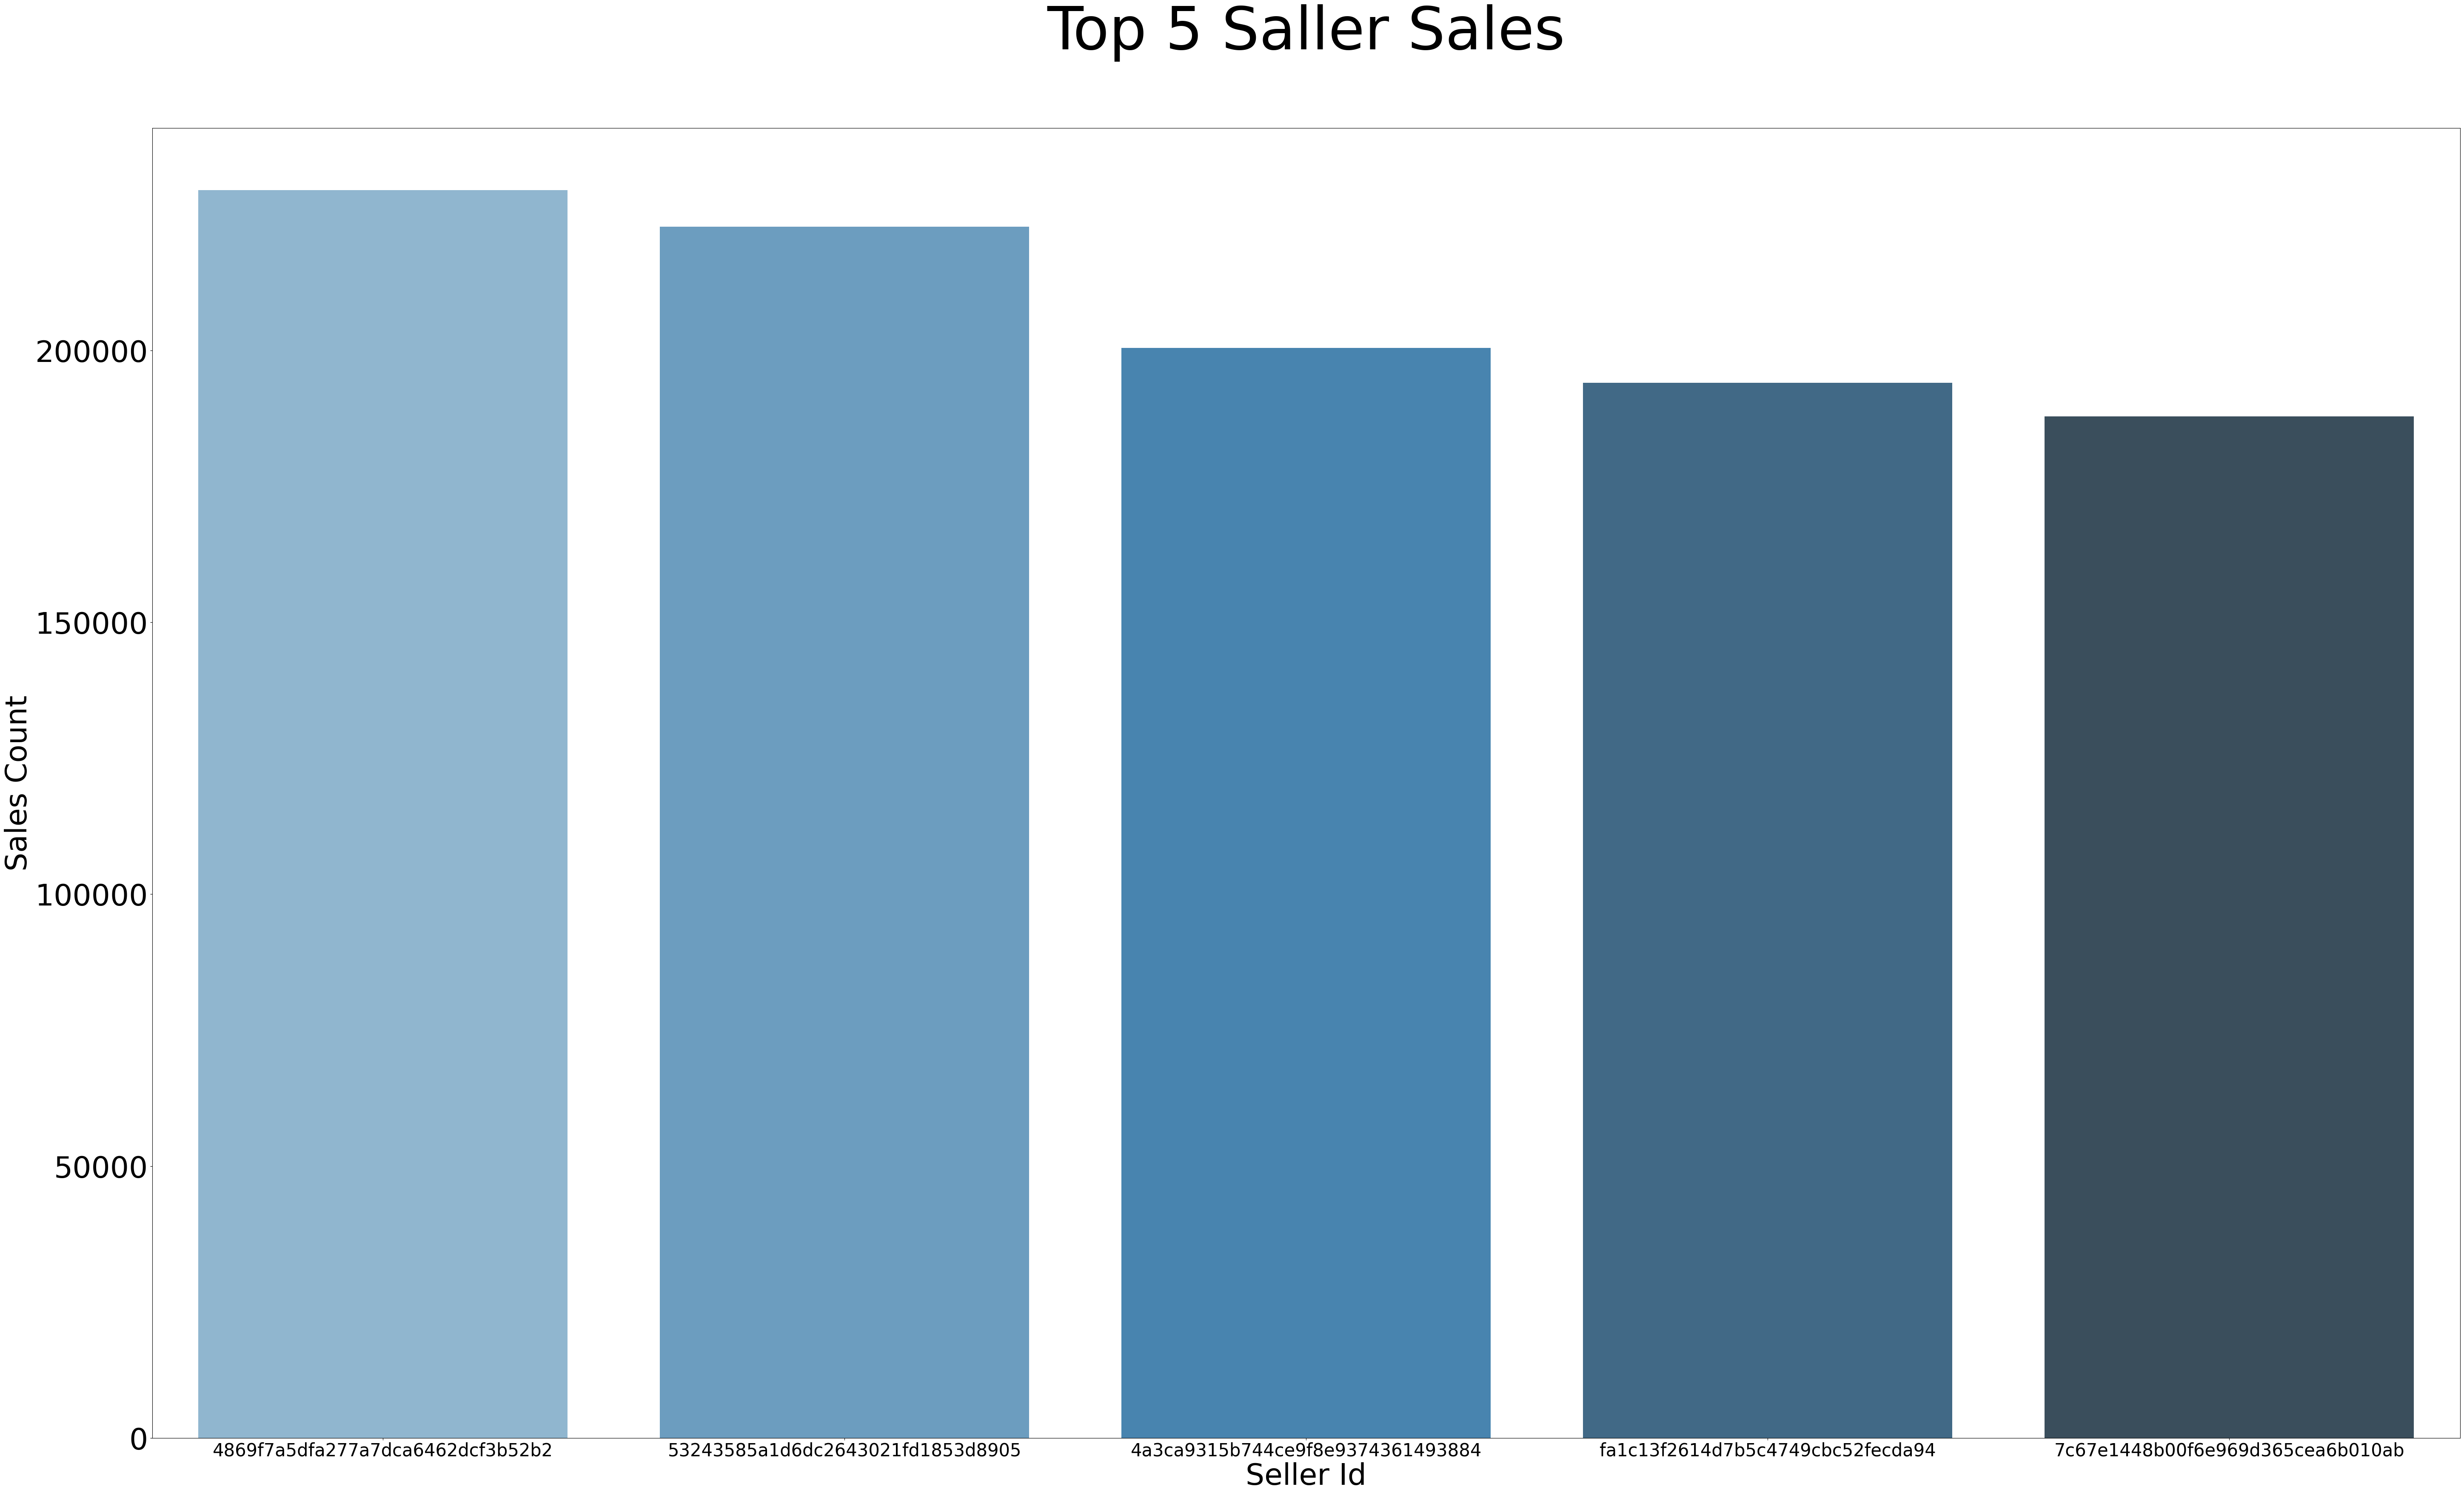

In [32]:
plt.figure(figsize=(70, 40))

sns.barplot(
    y="seller_sales",
    x="seller_id",
    data=seller_sales.head(5).sort_values(by="seller_sales", ascending=False),
    palette="Blues_d",
)
plt.title("Top 5 Seller Sales\n", loc="center", fontsize=100)
plt.ylabel("Sales Count", fontsize=50)
plt.xlabel("Seller Id", fontsize=50)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=50)
plt.show()

### Pertanyaan 2:Produk apa yang memberikan kontribusi terbesar terhadap pendapatan e-commerce?

Mengubah nama kolom 'price' menjadi 'total'untuk lebih menjelaskan bahwa pada kolom tersebut merupakan hasil penjualan setiap produk dan menyortirnya untuk menampilkan 5 produk yang memiliki hasil penjualan tertinggi, sehingga memberikan kontribusi terbesar terhadap pendapatan e-commerce

In [40]:
total_price.rename(columns={'price': 'total'}, inplace=True)
total_price.head()

,product_category_name,total
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32


Membuat pie diagram atau diagram lingkaran dari hasil analisis yang telah dilakukan

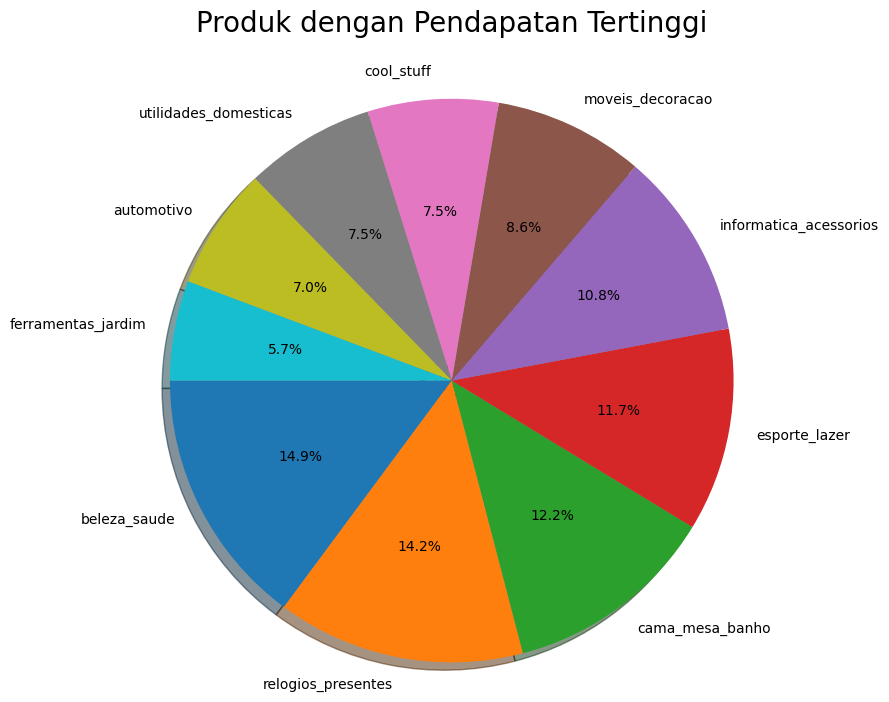

In [59]:
top_product = total_price.head(10)

plt.figure(figsize=(8, 8))

plt.pie(
    top_product['total'],
    labels=top_product['product_category_name'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=180
)

plt.title("Produk dengan Pendapatan Tertinggi\n", loc="center", fontsize=20)
plt.axis('equal')
plt.show()

### Pertanyaan 3: Wilayah negara bagian mana yang memiliki jumlah pelanggan terbanyak?

Mengubah nama kolom 'customer_id' menjadi 'customer_count' untuk lebih menjelaskan bahwa pada kolom tersebut merupakan total customer pada setiap wilayah negara bagian dan menyortirnya untuk menampilkan 10 wilayah negara bagian yang memiliki customer terbanyak

In [35]:
customers_state.rename(columns={'customer_id': 'customer_count'}, inplace=True)
customers_state.head(10)

,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Membuat bar plot atau diagram batang dari hasil analisis yang telah dilakukan

<ipython-input-38-decee635cfa7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-38-decee635cfa7>:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

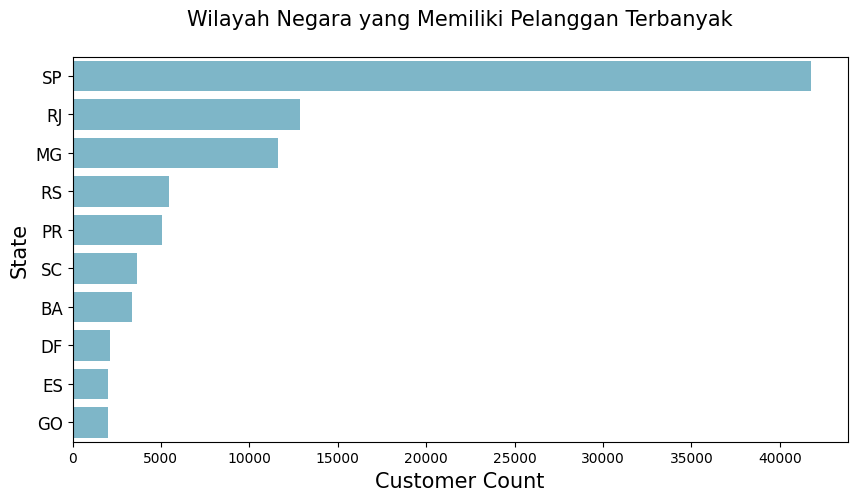

In [38]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=customers_state.head(10).sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Wilayah Negara yang Memiliki Pelanggan Terbanyak\n", loc="center", fontsize=15)
plt.ylabel("State", fontsize=15)
plt.xlabel("Customer Count", fontsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
Explanatory Analysis merupakan proses analisis data untuk membagikan beberapa insight yang menarik dari sebuah data. Pada proses Explanatory yang telah saya lakukan, saya telah menemukan beberapa insight menarik atau hasil dari pertanyaan yang telah saya buat yaitu menemukan data seller atau penjual yang memiliki hasil penjualan terbanyak, produk yang memiliki kontribusi terbesar terhadap pendapatan e-commerce, dan menemukan wilayah negara bagian yang memiliki pelanggan terbanyak.

Visualization merupakan proses menyajikan data analisis yang telah kita buat dalam bentuk visual sehingga dapat dipahami oleh orang lain atau stakeholder. Pada proses Visualisasi yang telah saya lakukan saya telah membuat visualisasi dari hasil analisis yang telah saya lakukan, yaitu membuat visualisasi 5 penjual yang memiliki hasil penjualan tertinggi dengan menampilkan id seller (seller id) dan hasil penjualannya (sales count) dalam diagram batang, membuat visualisasi 5 produk yang memiliki kontribusi terbesar terhadap pendapatan e-commerce atau memiliki pendapatan tertinggi dengan menampilkan nama produk dan besaran pendapatan dalam bentuk persentase dalam diagram lingkaran, membuat visualisasi data 10 wilayah negara bagian yang memiliki jumlah pelanggan terbanyak dengan menampilkan state (wilayah negara bagian) dan jumlah customer (customer count) dalam diagram batang.

## Analisis Lanjutan (Opsional)

In [57]:
# Merge order items with orders to get the customer_id
# Make sure 'order_id' and 'customer_id' exist in orders_df
order_items_orders_combined = pd.merge(
    orderItem_df, orders_df[['order_id', 'customer_id']], on="order_id", how="inner"
)

# Now, merge this result with the customer data (including customer_state)
# Make sure 'customer_id' and 'customer_state' exist in customer_df
order_customer_combined = pd.merge(
    order_items_orders_combined, customer_df[['customer_id', 'customer_state']], on="customer_id", how="inner"
)

# Finally, merge with the product data to get product information
# Make sure 'product_id' exists in both orderItem_df and product_df_cleaned
final_combined_df = pd.merge(
    order_customer_combined, product_df_cleaned[['product_id', 'product_category_name']], on="product_id", how="inner"
)

# Save the final combined data to a CSV file
final_combined_df.to_csv('combined_data_for_dashboard.csv', index=False)

print("Data combined and saved as 'combined_data_for_dashboard.csv'")


Data combined and saved as 'combined_data_for_dashboard.csv'


In [58]:
print(final_combined_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'customer_state', 'product_category_name'],
      dtype='object')


## Conclusion

- Pertanyaan 1 : dari hasil analisis yang telah dilakukan maka penjual yang memiliki hasil penjualan terbanyak adalah dengan seller_id (4869f7a5dfa277a7dca6462dcf3b52b2) dengan hasil penjualan (229472.63)
- Pertanyaan 2 : dari hasil analisis yang telah dilakukan maka produk yang memiliki kontribusi terbesar terhadap pendapatan e-commerce adalah produk (beleza_saude) dengan total pendapatan (1258681.34) atau (23,3%)
- Pertanyaan 3 : dari hasil analisis yang telah dilakukan maka wilayah negara bagian (state) yang memiliki pelanggan terbanyak adalah (SP) dengan jumlah pelanggan (41746)